In [7]:
import numpy as np
from scipy.fft import fft

def estimate_noise_profile(noise_signal, segment_length=5000):
    """
    Estimate noise profile from a noise-only segment of the noisy signal.
    
    Parameters:
        noise_signal (ndarray): Noisy audio signal containing only noise.
        segment_length (int): Length of the noise-only segment.
    
    Returns:
        ndarray: Noise profile (magnitude spectrum).
    """
    # Extract a segment of the noisy signal containing only noise
    noise_segment = noise_signal[:segment_length]
    
    # Compute FFT of the noise segment
    noise_fft = fft(noise_segment)
    
    # Calculate the magnitude spectrum of the noise segment
    noise_profile = np.abs(noise_fft)
    
    return noise_profile

# Example usage:
# Assuming 'noisy_audio' is a numpy array representing the noisy audio signal
# Specify the length of the noise-only segment based on the duration of the noise-only portion in the signal
noisy_audio, sr = librosa.load('denoised_audio.wav', sr = None)
print(noisy_audio.shape, sr)
noise_profile = estimate_noise_profile(noisy_audio)


(22962,) 44000


In [9]:
import numpy as np
from scipy.fft import fft, ifft

def spectral_subtraction(audio_signal, noise_signal, alpha=1):
    """
    Spectral subtraction for audio denoising.
    
    Parameters:
        audio_signal (ndarray): Noisy audio signal.
        noise_signal (ndarray): Noise signal (can be an estimate or actual noise).
        alpha (float): Suppression factor for noise estimation.
    
    Returns:
        ndarray: Denoised audio signal.
    """
    # Compute FFT of audio signal and noise signal
    audio_fft = fft(audio_signal)
    noise_fft = fft(noise_signal)
    
    # Estimate noise spectrum
    noise_spectrum = np.abs(noise_fft)
    
    # Compute spectral subtraction
    denoised_spectrum = np.maximum(np.abs(audio_fft) - alpha * noise_spectrum, 0)
    
    # Apply phase of the noisy signal to the denoised spectrum
    denoised_spectrum *= np.exp(1j * np.angle(audio_fft))
    
    # Inverse FFT to obtain denoised audio signal
    denoised_signal = ifft(denoised_spectrum).real
    
    return denoised_signal

# Example usage:
# Assuming you have 'noisy_audio' and 'noise_profile' as numpy arrays representing the noisy audio signal and noise profile respectively
# Specify the suppression factor 'alpha' based on the noise level and desired amount of noise reduction
denoised_audio = spectral_subtraction(noisy_audio[5000:10000], noise_profile, alpha=1)


UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('complex64') to dtype('float32') with casting rule 'same_kind'

In [6]:
22962/44000


0.5218636363636364

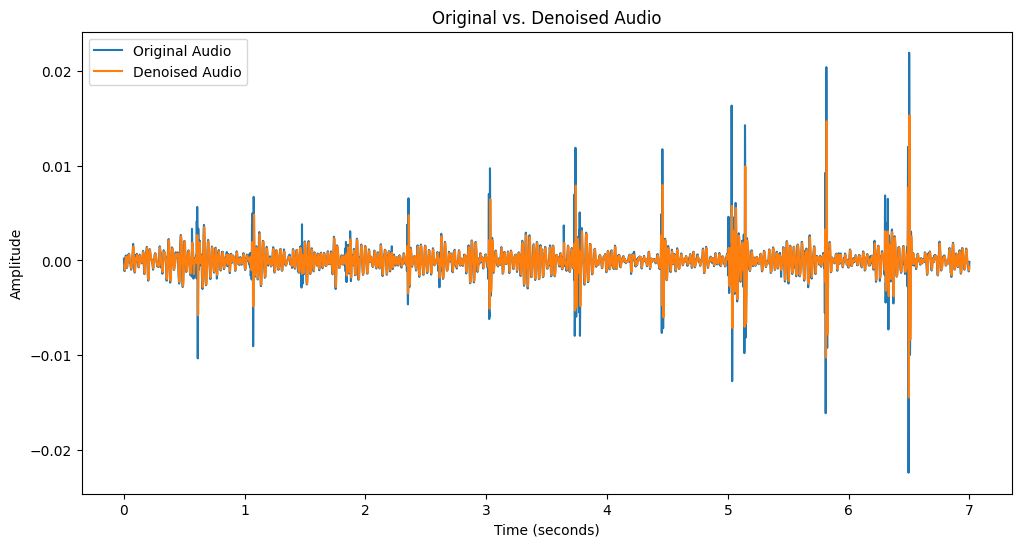

In [16]:
# Define function to apply moving average filter
import matplotlib.pyplot as plt
import librosa
def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

data_array,sr=librosa.load('audio1.wav',sr=None)
# Apply moving average filter
data_array=data_array[15*sr:22*sr]
window_size = 20
denoised_data = moving_average_filter(data_array, window_size)
sampling_rate = sr
# Calculate the total time duration of the recording
total_time = len(data_array) / sampling_rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
t = np.linspace(0, total_time, len(data_array))  # Generate time axis based on total recording time
# write("denoised_audio.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(12, 6))
plt.plot(t, data_array, label='Original Audio')
plt.plot(t[window_size - 1:], denoised_data, label='Denoised Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [ ]:
# Define function to apply moving average filter
import matplotlib.pyplot as plt
import librosa
def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

data_array,sr=librosa.load('audio1.wav',sr=None)
# Apply moving average filter
data_array=data_array[15*sr:22*sr]
window_size = 20
denoised_data = moving_average_filter(data_array, window_size)
sampling_rate = sr
# Calculate the total time duration of the recording
total_time = len(data_array) / sampling_rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
t = np.linspace(0, total_time, len(data_array))  # Generate time axis based on total recording time
# write("denoised_audio.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(12, 6))
plt.plot(t, data_array, label='Original Audio')
plt.plot(t[window_size - 1:], denoised_data, label='Denoised Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [17]:
sr


4000

Invalid data received: Finished sampling
Received: 16
Received: 17
Received: 16
Received: 16
Received: 17
Received: 16
Received: 17
Received: 17
Received: 17
Received: 17
Received: 18
Received: 18
Received: 18
Received: 18
Received: 19
Received: 19
Received: 18
Received: 17
Received: 17
Received: 18
Received: 19
Received: 19
Received: 19
Received: 20
Received: 21
Received: 21
Received: 20
Received: 20
Received: 20
Received: 19
Received: 19
Received: 20
Received: 19
Received: 19
Received: 18
Received: 17
Received: 17
Received: 18
Received: 17
Received: 17
Received: 16
Received: 17
Received: 17
Received: 18
Received: 17
Received: 18
Received: 18
Received: 18
Received: 18
Received: 18
Received: 18
Received: 18
Received: 18
Received: 18
Received: 19
Received: 19
Received: 18
Received: 19
Received: 19
Received: 19
Received: 19
Received: 18
Received: 17
Received: 18
Received: 17
Received: 17
Received: 17
Received: 18
Received: 16
Received: 16
Received: 17
Received: 16
Received: 15
Received: 

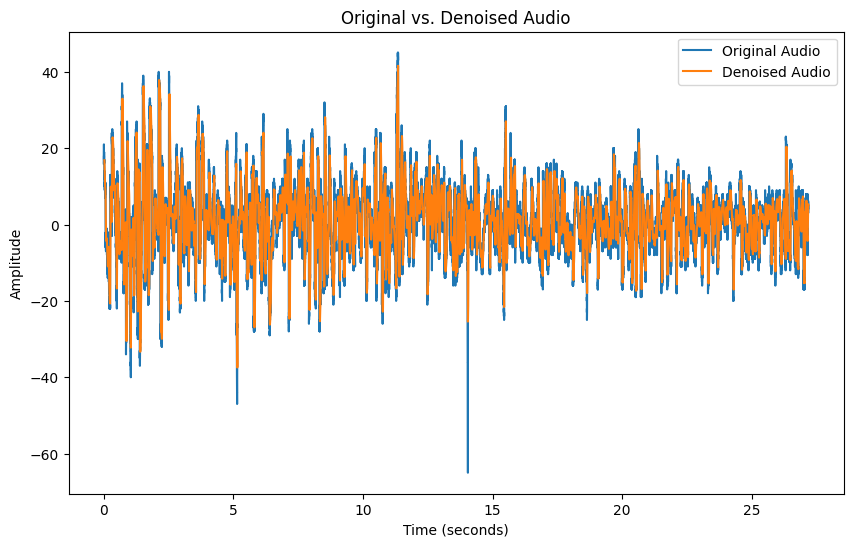

In [11]:
import serial
import wave
import pyaudio
import time
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.io.wavfile import write


# Establish serial connection
ser = serial.Serial('COM9', 115200)  # Change 'COM5' to the appropriate port and 9600 to the baud rate of your device

# Define list to store data
data_list = []

try:
    while True:
        # Read data from serial port
        line = ser.readline().decode().strip()
        
        # Check if the line is not empty
        if line:
            try:
                data_point = int(line)
                data_list.append(data_point)
                print("Received:", data_point)
            except ValueError:
                print("Invalid data received:", line)

except KeyboardInterrupt:
    print("Interrupted")

finally:
    # Close serial port
    ser.close()

# Convert the collected data to a NumPy array
data_array = np.array(data_list)

# Define function to apply moving average filter
def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Apply moving average filter
window_size = 100
denoised_data = moving_average_filter(data_array, window_size)
sampling_rate =4000
# Calculate the total time duration of the recording
total_time = len(data_array) / sampling_rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
t = np.linspace(0, total_time, len(data_array))  # Generate time axis based on total recording time
write("datafrommic/mehul/final_denoised_audio_divyanshu_test_2.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(10, 6))
plt.plot(t, data_array, label='Original Audio')

plt.plot(t[window_size - 1:], denoised_data, label='Denoised Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

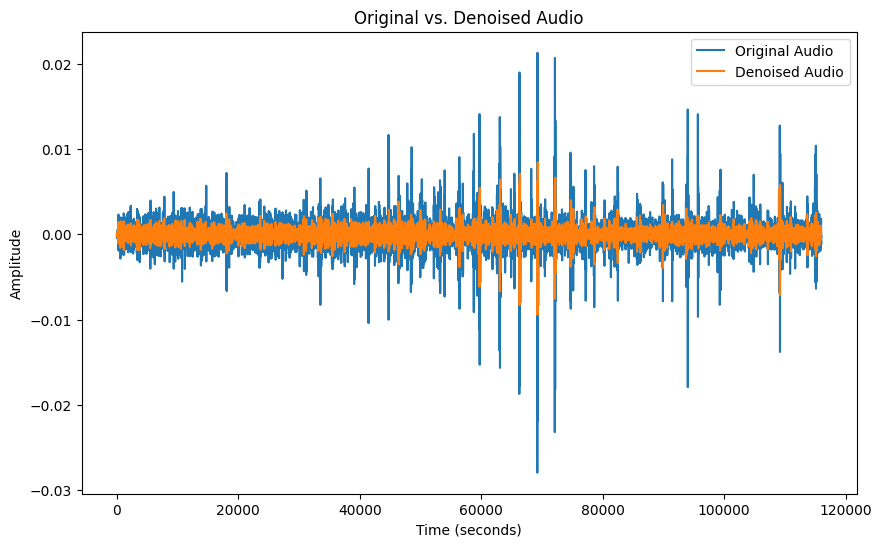

In [17]:
import serial
import wave
import pyaudio
import time
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.io.wavfile import write


# # Establish serial connection
# ser = serial.Serial('COM9', 115200)  # Change 'COM5' to the appropriate port and 9600 to the baud rate of your device

# # Define list to store data
# data_list = []

# try:
#     while True:
#         # Read data from serial port
#         line = ser.readline().decode().strip()
        
#         # Check if the line is not empty
#         if line:
#             try:
#                 data_point = int(line)
#                 data_list.append(data_point)
#                 print("Received:", data_point)
#             except ValueError:
#                 print("Invalid data received:", line)

# except KeyboardInterrupt:
#     print("Interrupted")

# finally:
#     # Close serial port
#     ser.close()

# # Convert the collected data to a NumPy array
data_array , r = librosa.load("C:/Users/Asus/Desktop/dp_mic_data/datafrommic/foam/Foam_Divyanshu-Eko Recording Sound Export 04_22_2024 4_58 PM.wav", sr =None)

# Define function to apply moving average filter
def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Apply moving average filter
window_size = 50
denoised_data = moving_average_filter(data_array, window_size)
sampling_rate =r
# Calculate the total time duration of the recording
total_time = len(data_array) / sampling_rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
t = np.linspace(0, total_time, len(data_array))  # Generate time axis based on total recording time
# write("datafrommic/mehul/final_denoised_audio_divyanshu_test_2.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(10, 6))
plt.plot(data_array, label='Original Audio')
plt.plot(denoised_data, label='Denoised Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

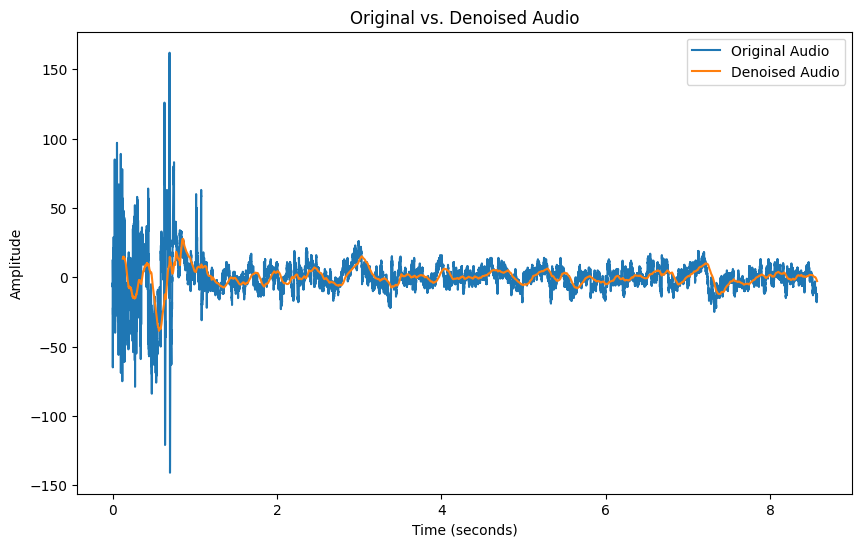

In [55]:
window_size = 500
denoised_data_1 = moving_average_filter(data_array, window_size)
sampling_rate =5000
# Calculate the total time duration of the recording
total_time = len(data_array) / sampling_rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
#t = np.linspace(0, total_time, len(data_array))  # Generate time axis based on total recording time
#write("datafrommic/mehul/final_denoised_audio_divyanshu_test.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(10, 6))
plt.plot(t, data_array, label='Original Audio')
plt.plot(t[window_size - 1:], denoised_data_1, label='Denoised Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [11]:
data_array.shape

(30284,)

In [41]:
sampling_rate


4000

In [1]:
# Define function to apply moving average filter
import matplotlib.pyplot as plt
import librosa

In [17]:
data_array_mic,sr_mic=librosa.load("C:/Users/Asus/Desktop/dp_mic_data/datafrommic/foam/final_denoised_audio_divyanshu_foam.wav")

In [18]:
data_array,sr=librosa.load('C:/Users/Asus/Desktop/dp_mic_data/datafrommic/foam/Foam_Divyanshu_1_stethoscope.wav')

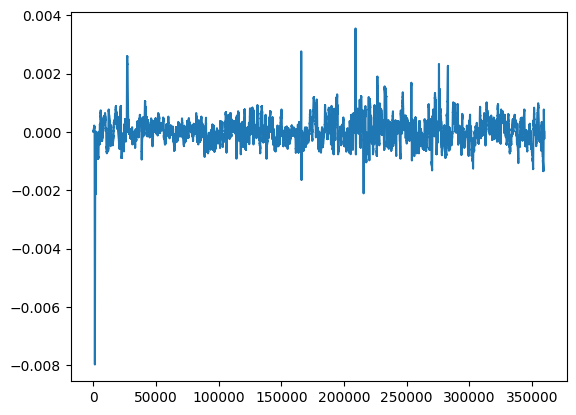

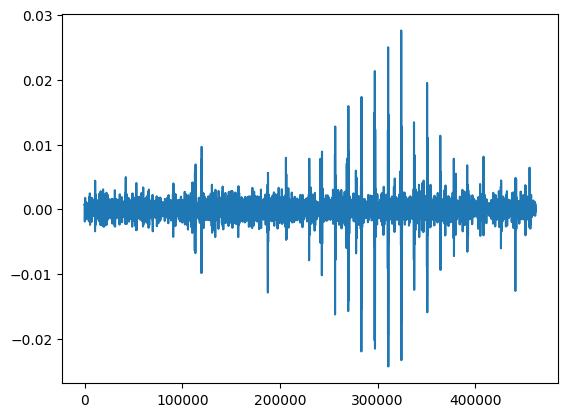

In [20]:
plt.plot(data_array_mic)
plt.show()
plt.plot(data_array)
plt.show()

In [10]:
data_array.shape

(607522,)

In [11]:
data_array_mic.shape

(661500,)

In [12]:
sr

22050

In [3]:
sr_mic

22050

In [5]:
sr

22050

In [15]:
71137159/sr

3226.1750113378685

In [1]:
# Define function to apply moving average filter
import matplotlib.pyplot as plt
import librosa
def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

data_array,sr=librosa.load('audio2.wav',sr=None)
# Apply moving average filter
data_array1=data_array[11*sr:26*sr]
window_size = 20
denoised_data1 = moving_average_filter(data_array1, window_size)
rate = sr
# Calculate the total time duration of the recording
total_time = len(data_array1) / rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
t = np.linspace(0, total_time, len(data_array1))  # Generate time axis based on total recording time
# write("denoised_audio.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(12, 6))
plt.plot(t, data_array1, label='Original Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t[window_size - 1:], denoised_data1, label='Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

KeyboardInterrupt: 

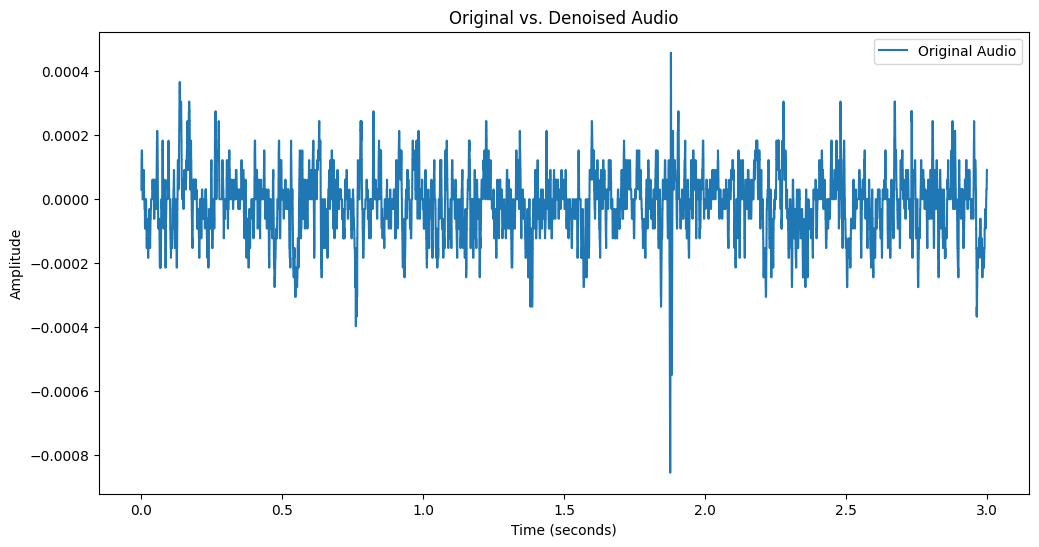

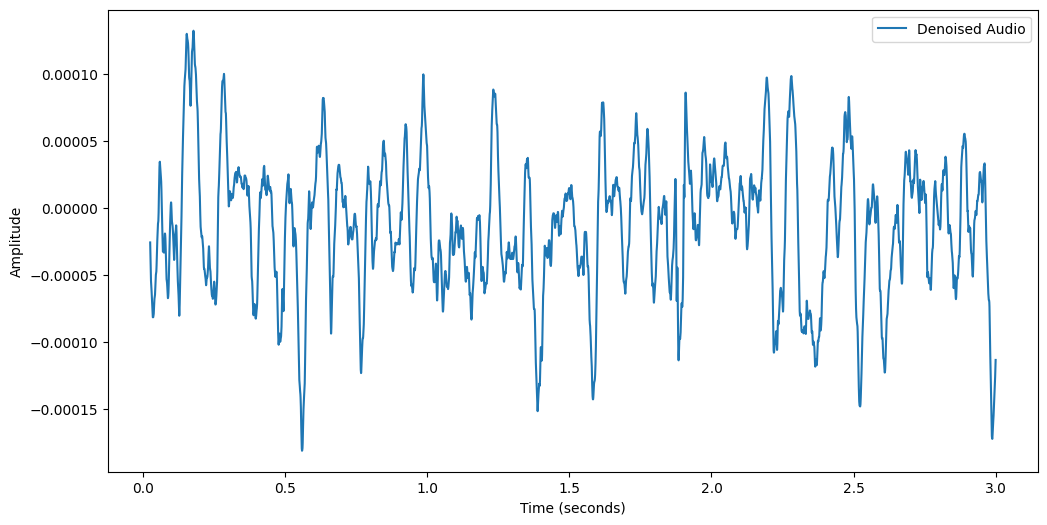

In [61]:
# Define function to apply moving average filter
import matplotlib.pyplot as plt
import librosa
def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

data_array,sr=librosa.load('datafrommic\denoised_audio.wav',sr=None)
rate = sr
# Apply moving average filter
data_array1=data_array[int(2.2)*rate:int(5.2)*rate]
window_size = 500
denoised_data = moving_average_filter(data_array1, window_size)

# Calculate the total time duration of the recording
total_time = len(data_array1) / rate

# Save denoised audio data as .wav file
  # You can adjust this according to your sampling rate
t = np.linspace(0, total_time, len(data_array1))  # Generate time axis based on total recording time
# write("denoised_audio.wav", sampling_rate, denoised_data.astype(np.int16))

# Plot original and denoised data
plt.figure(figsize=(12, 6))
plt.plot(t, data_array1, label='Original Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t[window_size - 1:], denoised_data, label='Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [51]:
44000/20000

2.2

In [54]:
26*sr/20000

5.2

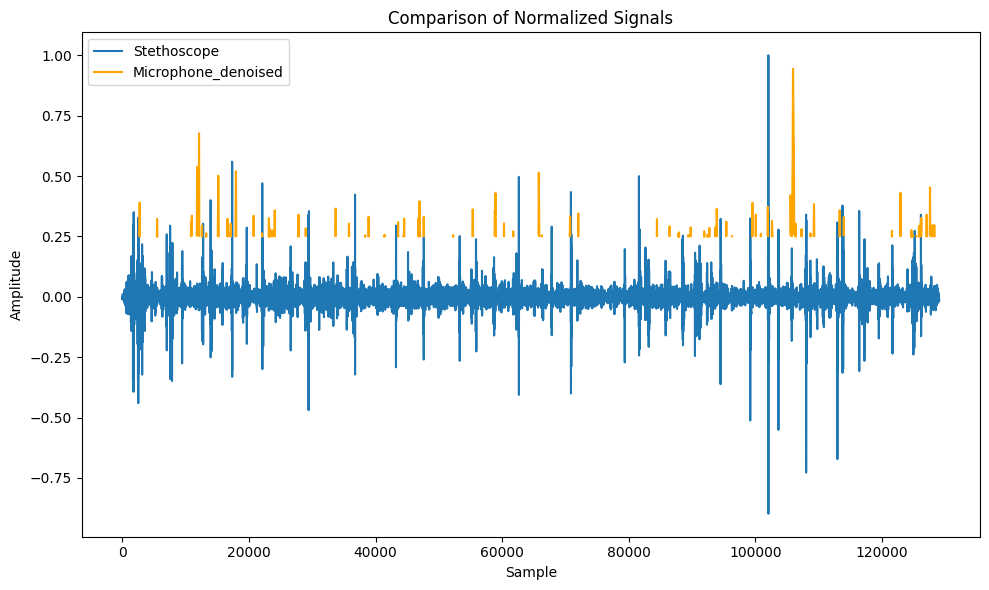

In [4]:
import scipy.signal as signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size
# Load the WAV files
fs1, signal1 = wavfile.read('Deepansha_stethoscope_1.wav')
fs2, signal2 = wavfile.read('denoised_audio_deep_1.wav')

print(fs1,fs2)

# Resample the signal with the higher sample rate to match the lower one
if fs1 < fs2:
    signal2_resampled = signal.resample(signal2, len(signal1))
    signal1_resampled=signal1
    fs_resampled = fs1
else:
    signal1_resampled = signal.resample(signal1, len(signal2))
    signal2_resampled=signal2
    fs_resampled = fs2

import numpy as np

# Normalize the signals
signal1_normalized = signal1_resampled / np.max(np.abs(signal1_resampled))
signal2_normalized = signal2_resampled / np.max(np.abs(signal2_resampled))

window_size = 50
denoised_data = moving_average_filter(signal2_normalized, window_size)

# Now both signals have been normalized
# You can perform any comparison or analysis here

# For example, you can plot both normalized signals
# Create three separate plots for comparison and individual signals
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Plot comparison of both signals
axs[0].plot(signal1_normalized, label='Stethoscope')
axs[0].plot(signal2_normalized, label='Microphone')
axs[0].ylim(0,10)
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Comparison of Normalized Signals')
axs[0].legend()

# Plot Signal 1
axs[1].plot(signal1_normalized, label='Stethoscope')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Signal 1')
axs[1].legend()

# Plot Signal 2
axs[2].plot(signal2_normalized, label='Microphone')
axs[2].set_xlabel('Sample')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Signal 2')
axs[2].legend()


axs[3].plot(signal1_normalized, label='Stethoscope')
axs[3].plot(denoised_data, label='Microphone_denoised')
axs[3].set_xlabel('Sample')
axs[3].set_ylabel('Amplitude')
axs[3].set_title('Comparison of Normalized Signals')
axs[3].legend()
# Adjust layout and display the plots
plt.tight_layout()
plt.show()
# import scipy.signal as signal
# from scipy.io import wavfile
# import matplotlib.pyplot as plt
# import numpy as np

# def moving_average_filter(data, window_size):
#     """Apply moving average filter to the data."""
#     cumsum = np.cumsum(data, dtype=float)
#     cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
#     return cumsum[window_size - 1:] / window_size

# # Load the WAV files
# fs1, signal1 = wavfile.read('Deepansha_stethoscope_1.wav')
# fs2, signal2 = wavfile.read('denoised_audio_deep_1.wav')

# # Resample the signal with the higher sample rate to match the lower one
# if fs1 < fs2:
#     signal2_resampled = signal.resample(signal2, len(signal1))
#     signal1_resampled = signal1
#     fs_resampled = fs1
# else:
#     signal1_resampled = signal.resample(signal1, len(signal2))
#     signal2_resampled = signal2
#     fs_resampled = fs2

# # Normalize the signals
# signal1_normalized = signal1_resampled / np.max(np.abs(signal1_resampled))
# signal2_normalized = signal2_resampled / np.max(np.abs(signal2_resampled))

# window_size = 50
# denoised_data = moving_average_filter(signal2_normalized, window_size)

# # Threshold for amplitude
# threshold = 0.25

# # Create a mask for values above the threshold
# mask = denoised_data > threshold

# # Plot only the portions of the signals where amplitude > threshold
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plot denoised signal
# ax.plot(signal1_normalized, label='Stethoscope')
# ax.plot(np.where(mask, denoised_data, np.nan), label='Microphone_denoised', color='orange')

# # Set plot labels and title
# ax.set_xlabel('Sample')
# ax.set_ylabel('Amplitude')
# ax.set_title('Comparison of Normalized Signals')
# ax.legend()

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()




In [19]:
129047*4000/120000

4301.566666666667

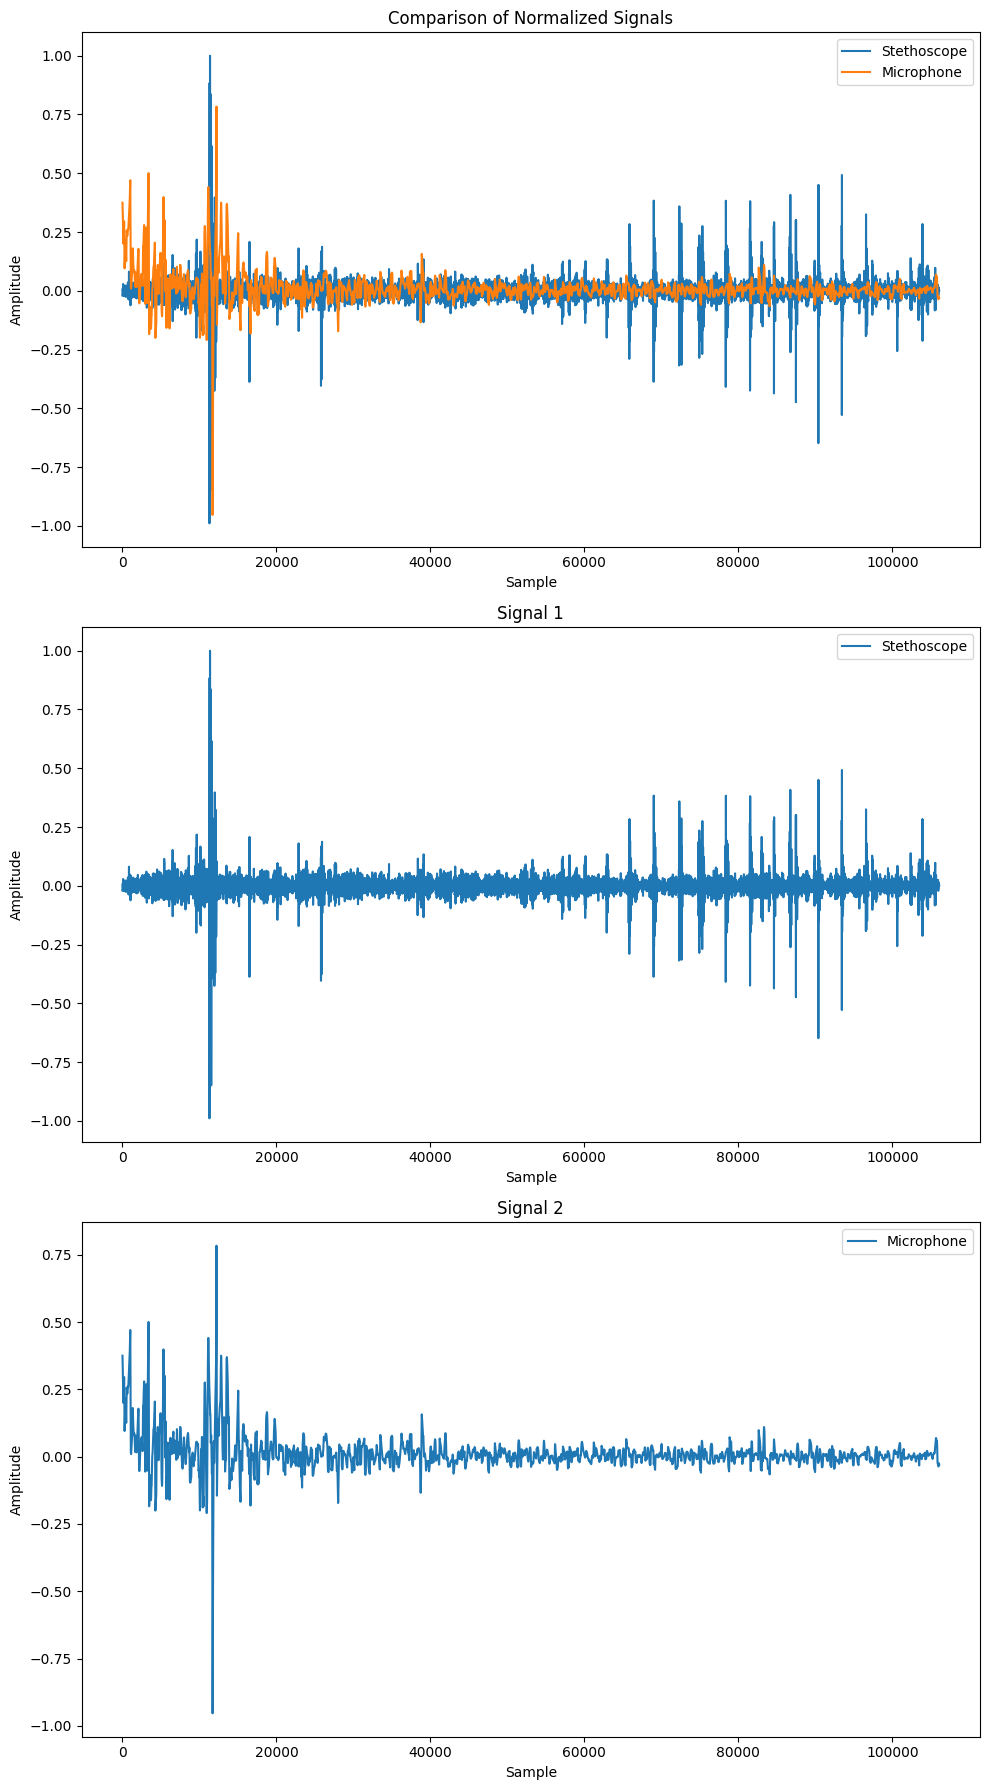

In [11]:
from scipy.signal import butter, filtfilt

# Define a low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Ensure the cutoff frequency is within the valid range (0 to 1)

# Apply the low-pass filter to the second signal


def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Set cutoff frequency for the low-pass filter (adjust as needed)

cutoff_frequency = 5000  # Adjust this value based on your signal characteristics
order = 5  # Order of the Butterworth filter
cutoff_frequency_normalized = min(cutoff_frequency / (0.5 * fs_resampled), 1.0)

# Apply the low-pass filter to the second signal
# signal2_filtered = apply_lowpass_filter(signal2_normalized, cutoff_frequency, fs_resampled, order)
signal2_filtered = apply_lowpass_filter(signal2_normalized, cutoff_frequency_normalized, fs_resampled, order)

# Plot the filtered signal
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot comparison of both signals
axs[0].plot(signal1_normalized, label='Stethoscope')
axs[0].plot(signal2_filtered, label='Microphone')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Comparison of Normalized Signals')
axs[0].legend()

# Plot Signal 1
axs[1].plot(signal1_normalized, label='Stethoscope')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Signal 1')
axs[1].legend()

# Plot Signal 2
axs[2].plot(signal2_filtered, label='Microphone')
axs[2].set_xlabel('Sample')
axs[2].set_ylabel('Amplitude')
axs[2].set_title('Signal 2')
axs[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


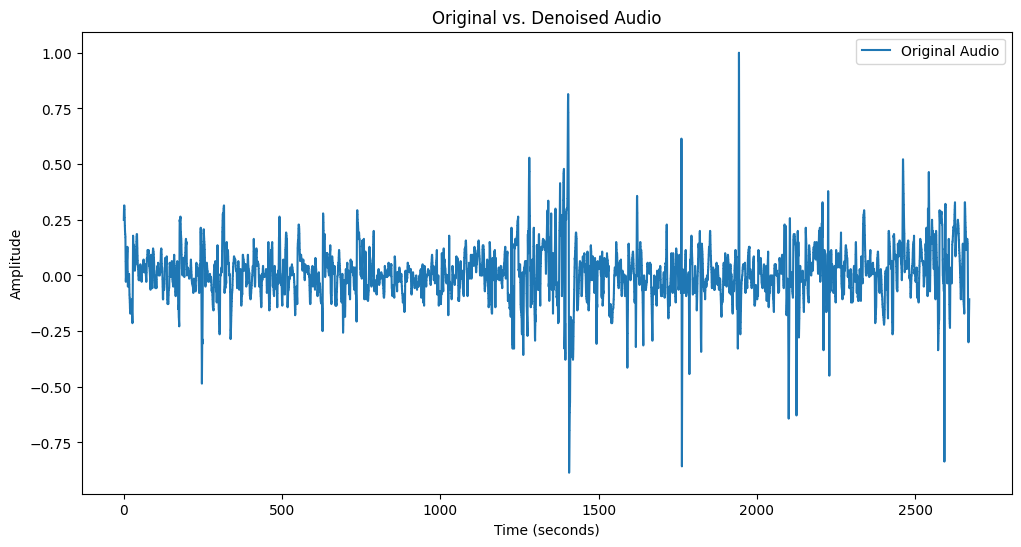

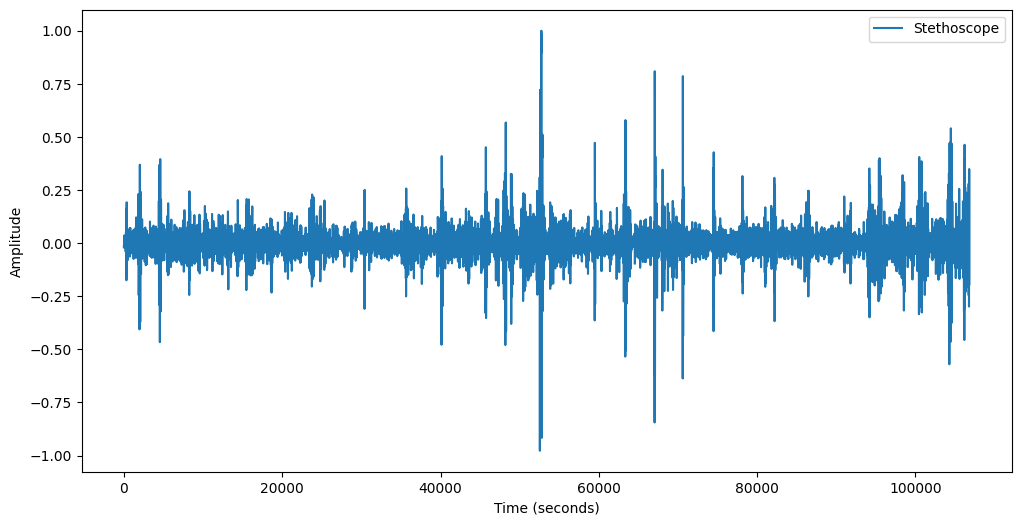

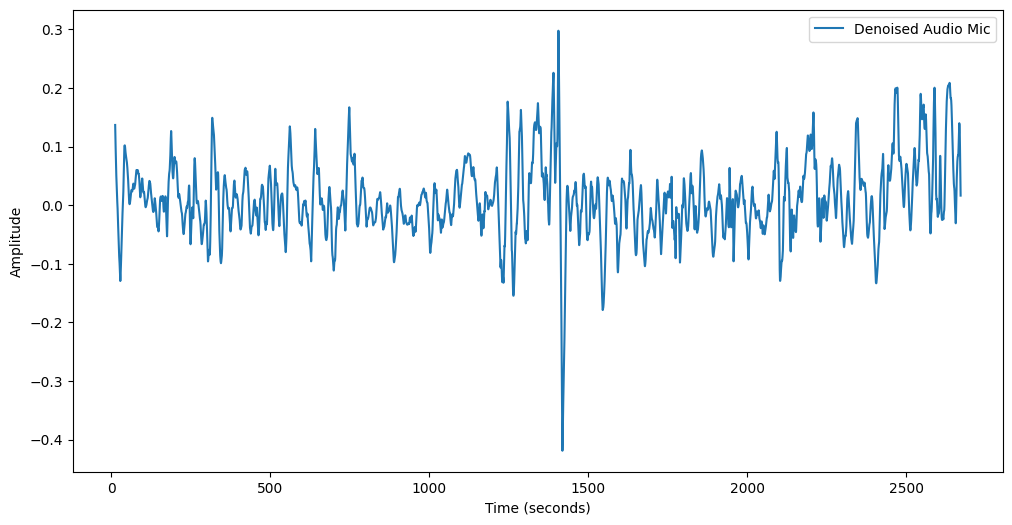

In [12]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

def moving_average_filter(data, window_size):
    """Apply moving average filter to the data."""
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Assuming you have already loaded and normalized audio data into 'data_array_normalized'
data_array_normalized = signal2_normalized  # Your normalized audio data of signal 2

# Set the sampling rate (sr) according to your data
sr = fs_resampled  # Sampling rate of your audio data

# Define the time axis based on the length of the audio data and the sampling rate
total_time = len(data_array_normalized) / sr
t = np.linspace(0, total_time, len(data_array_normalized))

# Apply moving average filter
window_size = 500
denoised_data = moving_average_filter(data_array_normalized, window_size)

# Plot original and denoised data
plt.figure(figsize=(12, 6))
plt.plot(t, data_array_normalized, label='Original Audio')
plt.title('Original vs. Denoised Audio')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(signal1_normalized, label='Stethoscope')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(t[window_size - 1:], denoised_data, label='Denoised Audio Mic')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
